In [1]:
import os

In [2]:
os.chdir('../dependencies/')

In [3]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
from linear_regression import linear_regression
from math import exp

In [4]:
class logistic_regression:
    def __init__(self,filename, alphas, number_of_iterations, training_perc, threshold = 0.5) : 
        self.filename = filename
        self.threshold = threshold
        self.alphas = alphas
        self.k = number_of_iterations
        self.training_perc = training_perc
        self.load_data()
        
    def load_data(self):
        df_data = analytics.read_csv(filename+".csv")
        names = ['x'+str(i+1) for i in range((df_data.shape[1])-1)] + ['y']
        df_data = analytics.read_csv(filename+".csv" , names = names)
        df_data['x0'] = 1
        cols = list(df_data.columns)
        cols = [cols[-1]] + list(cols[:-1])
        df_data = df_data[cols]
        df_data['y'] = df_data['y'].replace(-1,0)

        df_data_changed = df_data.drop(['x0','y'],axis = 1)
        df_data_changed['y']  = 0
        df_data_changed.to_csv(filename+'_changed.csv',index=False,header=False)
        self.df_data = df_data
        self.find_weights()
        
    
    def find_weights(self):
        lr = linear_regression()
        lr.load_data(filename+'_changed.csv')
        lr.monte_carlo(self.alphas,self.k,self.training_perc)
        training_set , testing_set = lr.split_data()
        lr.train( training_set , sgd  = True, plot_rmse = False , plot_metrics = False )
        lr.test(testing_set)
        self.maxima = lr.maxima
        self.minima = lr.minima
        self.w_star = lr.w_star
        self.predict()
        
    def predict(self):
        df_data = self.df_data
        if 'y_pred' in df_data.columns : df_data = df_data.drop('y_pred',axis=1)
        x = df_data.iloc[:,:-1]
        for col in range(len(self.minima)):
            x.iloc[:,col] = (x.iloc[:,col] - self.minima[col]) / (self.maxima[col] - self.minima[col])
        y_pred = []
        for i in range(len(df_data)):
            y_pred.append(self.logit(x.iloc[i]))
        y_pred = [1 if y > self.threshold else 0 for y in y_pred]
        df_data['y_pred'] = y_pred
        self.create_confusion_matrix(df_data['y'],df_data['y_pred'])
        self.df_data = df_data
        
        
    def bernoullis_distribution(self,x):
        db = maths.matmul(self.w_star.T,x)
        denominator = 1 + exp(-db)
        return 1/denominator

    def logit(self,x):
        x = maths.matrix(x)
        f_x = self.bernoullis_distribution(x.T)
        return (f_x)/(1-f_x)

    def create_confusion_matrix(self,y,y_pred):
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for i in range(len(y)):
            if y[i] == y_pred[i] == 1:
                tp = tp + 1
            elif y[i] == y_pred[i] == 0:
                tn = tn + 1
            elif y[i] == 1 and y_pred[i] == 0:
                fn = fn + 1
            else :
                fp = fp + 1

        conf_mat = {'tp':tp,'tn':tn,'fp':fp,'fn':fn}
        print("Confusion Matrix : ",conf_mat)
        self.confusion_matrix = conf_mat
        accuracy = self.find_accuracy()
        precision = self.find_precision()
        sensitivity = self.find_sensitivity()
        specificity = self.find_specificity()
        fscore = self.find_fscore()
 

    def find_precision(self,show = True):
        conf_mat = self.confusion_matrix
        precision = round((conf_mat['tp'])/(conf_mat['fp']+conf_mat['tp'])*100,2) 
        if show : print("Precision : ",precision,"%")
        return precision

    def find_accuracy(self, show = True):
        conf_mat = self.confusion_matrix
        accuracy = round((conf_mat['tp']+conf_mat['fp'])/(conf_mat['tp'] + conf_mat['tn'] + conf_mat['fp'] + conf_mat['fn'])*100,2)
        if show : print("Accuracy : ",accuracy,"%")
        return accuracy

    def find_sensitivity(self,show = True):
        conf_mat = self.confusion_matrix
        sensitivity = round((conf_mat['tp'])/(conf_mat['tp']+conf_mat['fn'])*100,2)
        if show : print("Sensivity : ",sensitivity,"%")
        return sensitivity

    def find_specificity(self,show = True):
        conf_mat = self.confusion_matrix
        specificity = round((conf_mat['tn'])/(conf_mat['fp']+conf_mat['tn'])*100,2)
        if show : print("Specificity : ",specificity,"%")
        return specificity

    def find_fscore(self,show=True):
        conf_mat = self.confusion_matrix
        f_score = round(2/((1/self.find_precision(False))+(1/self.find_sensitivity(False)))*100,2)
        if show : print("F1 Score : ",f_score,"%")
        return f_score        


For iteration number  1  : 
	Average RMSE for alpha :  0.0  :  52.272050109116456
	Average RMSE for alpha :  0.1  :  0.4570888422078888
	Average RMSE for alpha :  0.2  :  0.409770606700974
	Average RMSE for alpha :  0.30000000000000004  :  0.47714341212753714
	Average RMSE for alpha :  0.4  :  0.3498970215528242
	Average RMSE for alpha :  0.5  :  0.6027049391803107
	Average RMSE for alpha :  0.6000000000000001  :  0.7164668711035292
	Average RMSE for alpha :  0.7000000000000001  :  0.16317807224707068
	Average RMSE for alpha :  0.8  :  0.6496277742331331
	Average RMSE for alpha :  0.9  :  0.5903472762201322

For iteration number  2  : 
	Average RMSE for alpha :  0.0  :  124.3945026600767
	Average RMSE for alpha :  0.1  :  0.33197625776343714
	Average RMSE for alpha :  0.2  :  0.20273824429932985
	Average RMSE for alpha :  0.30000000000000004  :  0.49095395633828487
	Average RMSE for alpha :  0.4  :  0.24527161538987152
	Average RMSE for alpha :  0.5  :  0.22125804221058767
	Average RMS

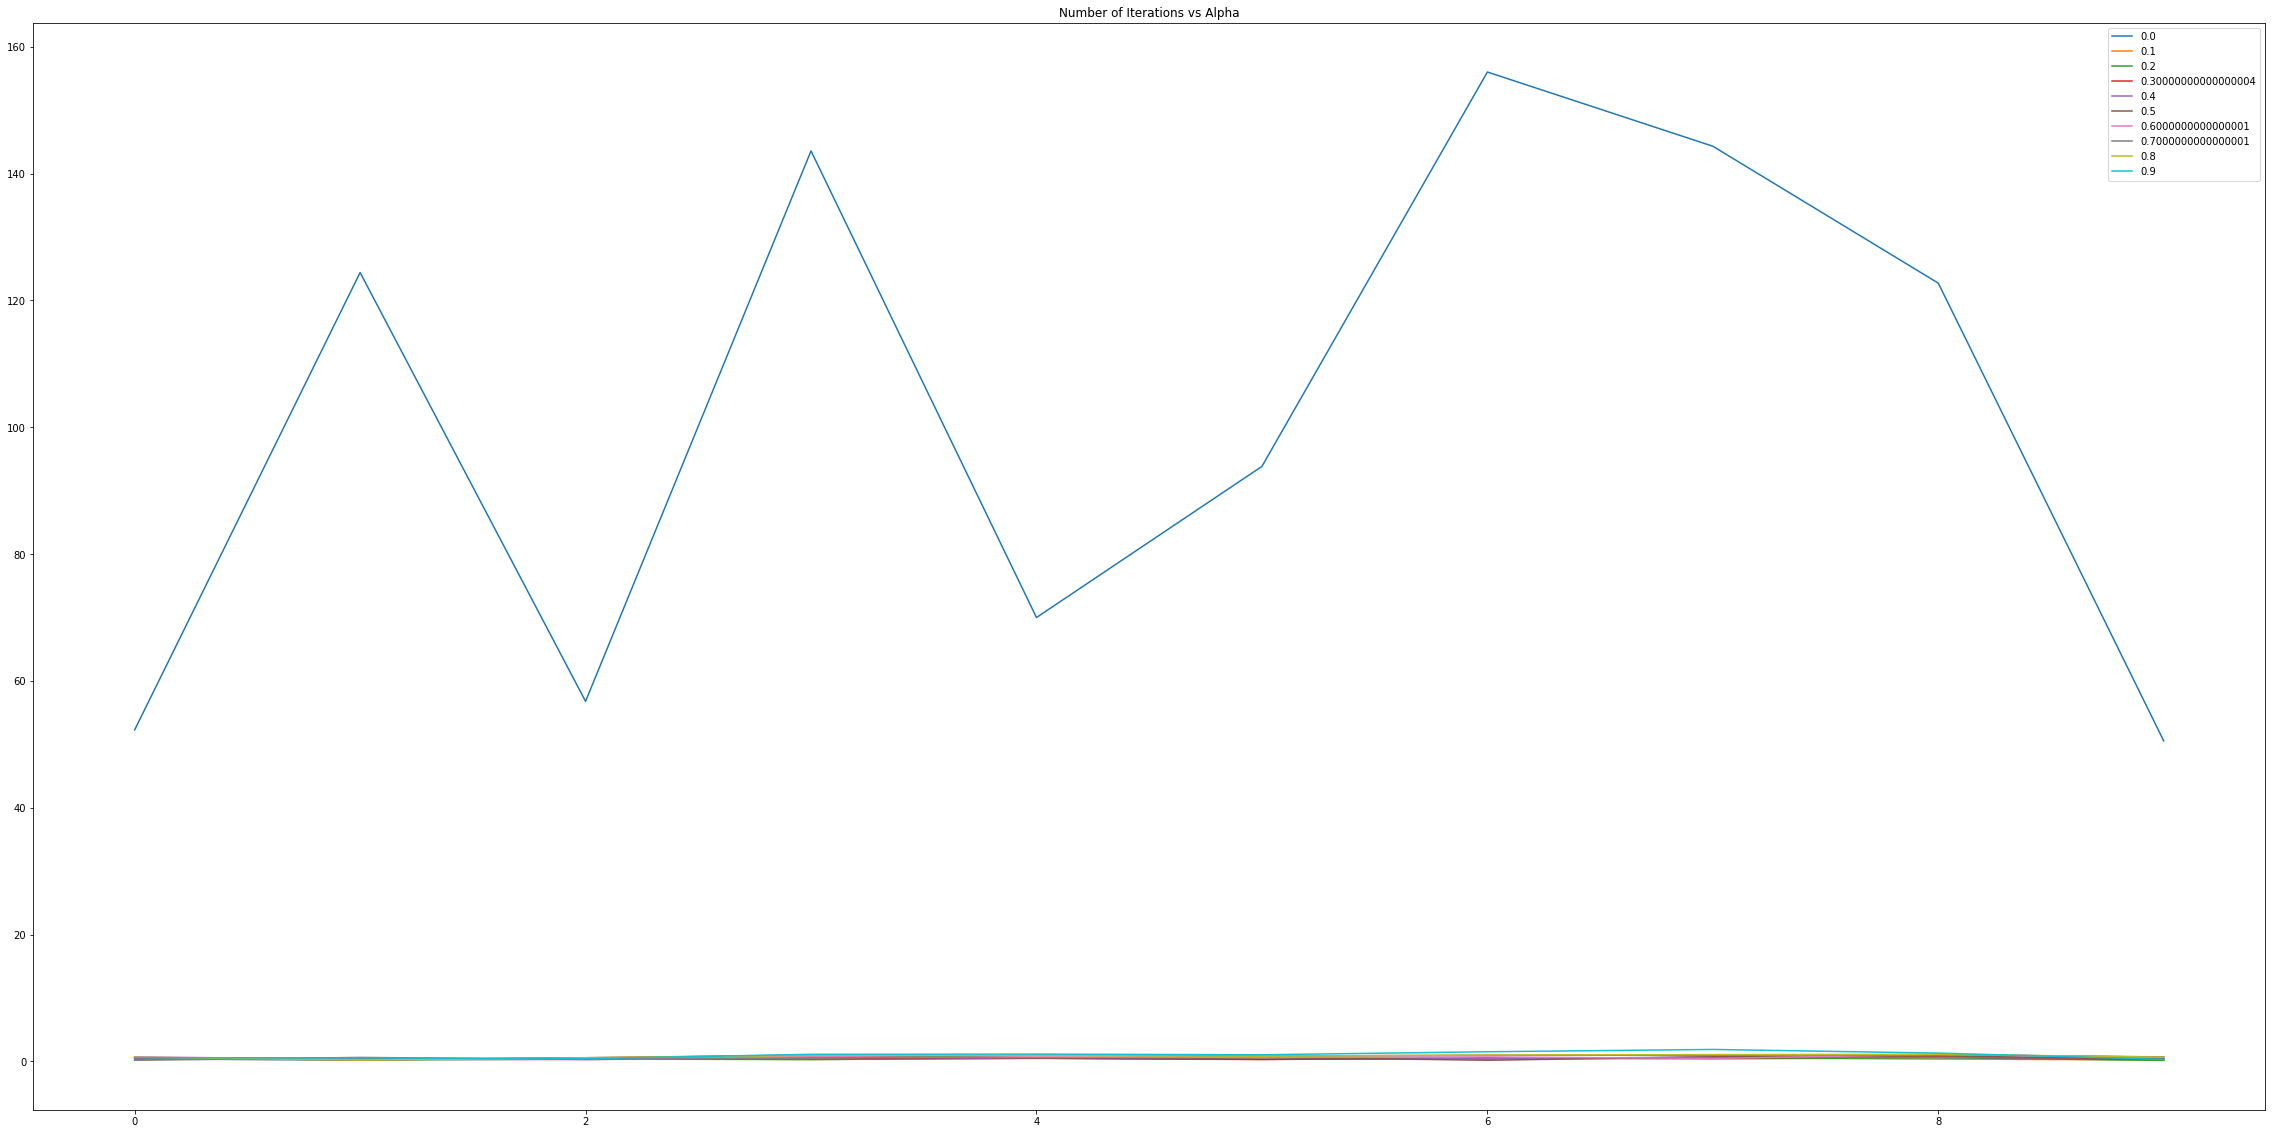

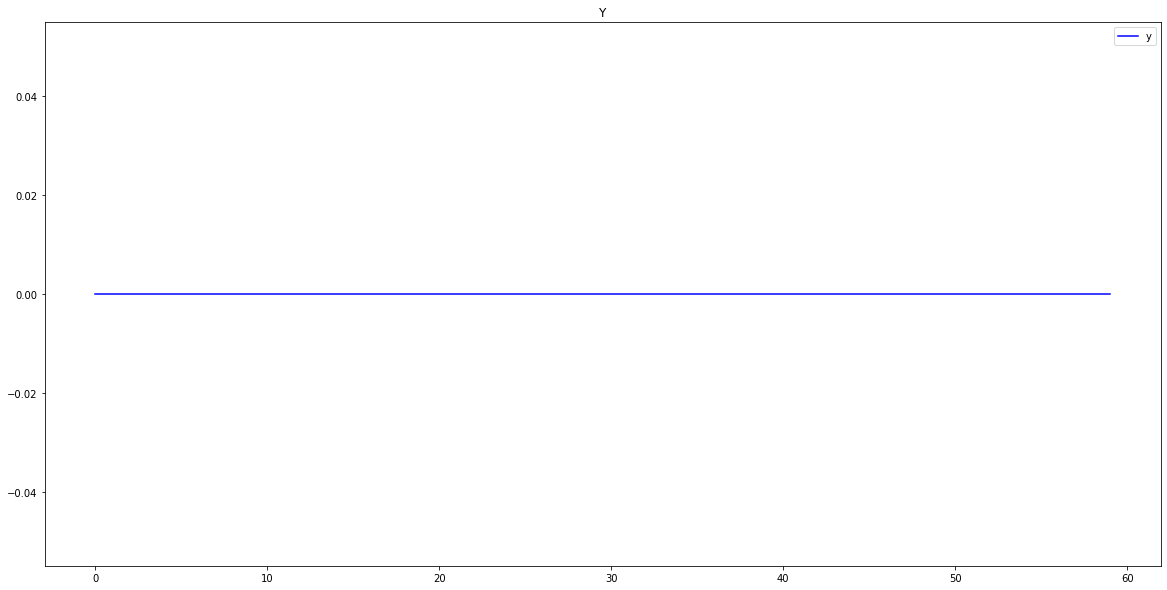

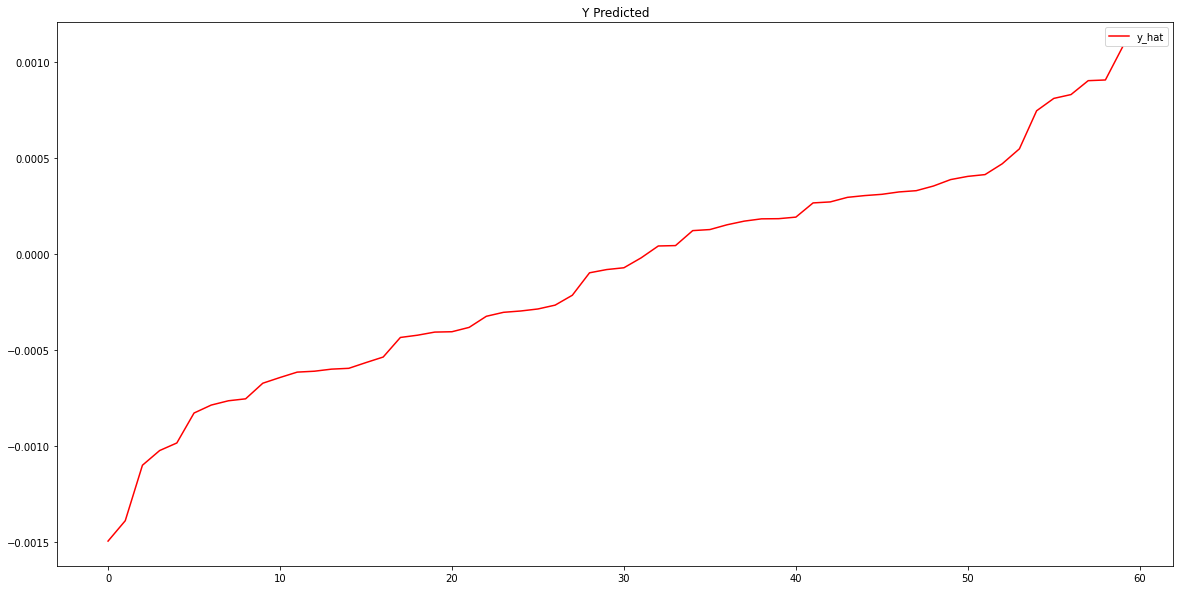

In [5]:
filename = '../data/data3'
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7


lr = logistic_regression(filename = filename , alphas = alphas , number_of_iterations = number_of_iterations ,
                         training_perc = training_perc )

# New Workings

In [183]:
def load_data():
    df_data = analytics.read_csv(filename+".csv")
    names = ['x'+str(i+1) for i in range((df_data.shape[1])-1)] + ['y']
    df_data = analytics.read_csv(filename+".csv" , names = names)
    df_data['x0'] = 1
    cols = list(df_data.columns)
    cols = [cols[-1]] + list(cols[:-1])
    df_data = df_data[cols]
    df_data['y'] = df_data['y'].replace(-1,0)
    return df_data


def create_confusion_matrix(y,y_pred):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == y_pred[i] == 1:
            tp = tp + 1
        elif y[i] == y_pred[i] == 0:
            tn = tn + 1
        elif y[i] == 1 and y_pred[i] == 0:
            fn = fn + 1
        else :
            fp = fp + 1

    confusion_matrix = {'tp':tp,'tn':tn,'fp':fp,'fn':fn}
    print("Confusion Matrix : ",confusion_matrix)
    confusion_matrix = confusion_matrix
    accuracy = find_accuracy(confusion_matrix)
    precision = find_precision(confusion_matrix)
    sensitivity = find_sensitivity(confusion_matrix)
    specificity = find_specificity(confusion_matrix)
    fscore = find_fscore(confusion_matrix)


def find_precision(confusion_matrix,show = True):
    confusion_matrix = confusion_matrix
    precision = round((confusion_matrix['tp'])/(confusion_matrix['fp']+confusion_matrix['tp'])*100,2) 
    if show : print("Precision : ",precision,"%")
    return precision

def find_accuracy(confusion_matrix,show = True):
    confusion_matrix = confusion_matrix
    accuracy = round((confusion_matrix['tp']+confusion_matrix['fp'])/(confusion_matrix['tp'] + confusion_matrix['tn'] + confusion_matrix['fp'] + confusion_matrix['fn'])*100,2)
    if show : print("Accuracy : ",accuracy,"%")
    return accuracy

def find_sensitivity(confusion_matrix,show = True):
    confusion_matrix = confusion_matrix
    sensitivity = round((confusion_matrix['tp'])/(confusion_matrix['tp']+confusion_matrix['fn'])*100,2)
    if show : print("Sensivity : ",sensitivity,"%")
    return sensitivity

def find_specificity(confusion_matrix,show = True):
    confusion_matrix = confusion_matrix
    specificity = round((confusion_matrix['tn'])/(confusion_matrix['fp']+confusion_matrix['tn'])*100,2)
    if show : print("Specificity : ",specificity,"%")
    return specificity

def find_fscore(confusion_matrix,show=True):
    confusion_matrix = confusion_matrix
    f_score = round(2/((1/find_precision(confusion_matrix,False))+(1/find_sensitivity(confusion_matrix,False))),2)
    if show : print("F1 Score : ",f_score)
    return f_score        


In [205]:
filename = '../data/data1'
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7

In [206]:
df_data = load_data()

In [207]:
validation_perc = 0.7 
validation_numbers = int(validation_perc * len(df_data))

In [208]:
df_data = df_data.sample(frac = 1)
df_validation = df_data[:validation_numbers]
df_test = df_data[validation_numbers:]

In [209]:
df_validation.iloc[:,1:].to_csv('validation.csv',header=False,index=False)

For iteration number  1  : 
	Average RMSE for alpha :  0.0  :  67.32042392616539
	Average RMSE for alpha :  0.1  :  1.7797491751054406
	Average RMSE for alpha :  0.2  :  1.7325972553710869
	Average RMSE for alpha :  0.30000000000000004  :  3.272437577568515
	Average RMSE for alpha :  0.4  :  2.549564931270534

For iteration number  2  : 
	Average RMSE for alpha :  0.0  :  110.12913267715874
	Average RMSE for alpha :  0.1  :  1.4765647844310241
	Average RMSE for alpha :  0.2  :  3.275683910926436
	Average RMSE for alpha :  0.30000000000000004  :  2.664153348496151
	Average RMSE for alpha :  0.4  :  2.9578364927072425

For iteration number  3  : 
	Average RMSE for alpha :  0.0  :  115.5775680414462
	Average RMSE for alpha :  0.1  :  2.028084102055402
	Average RMSE for alpha :  0.2  :  2.3281304356989048
	Average RMSE for alpha :  0.30000000000000004  :  2.429147616373736
	Average RMSE for alpha :  0.4  :  2.930573318770788

For iteration number  4  : 
	Average RMSE for alpha :  0.0  :  1

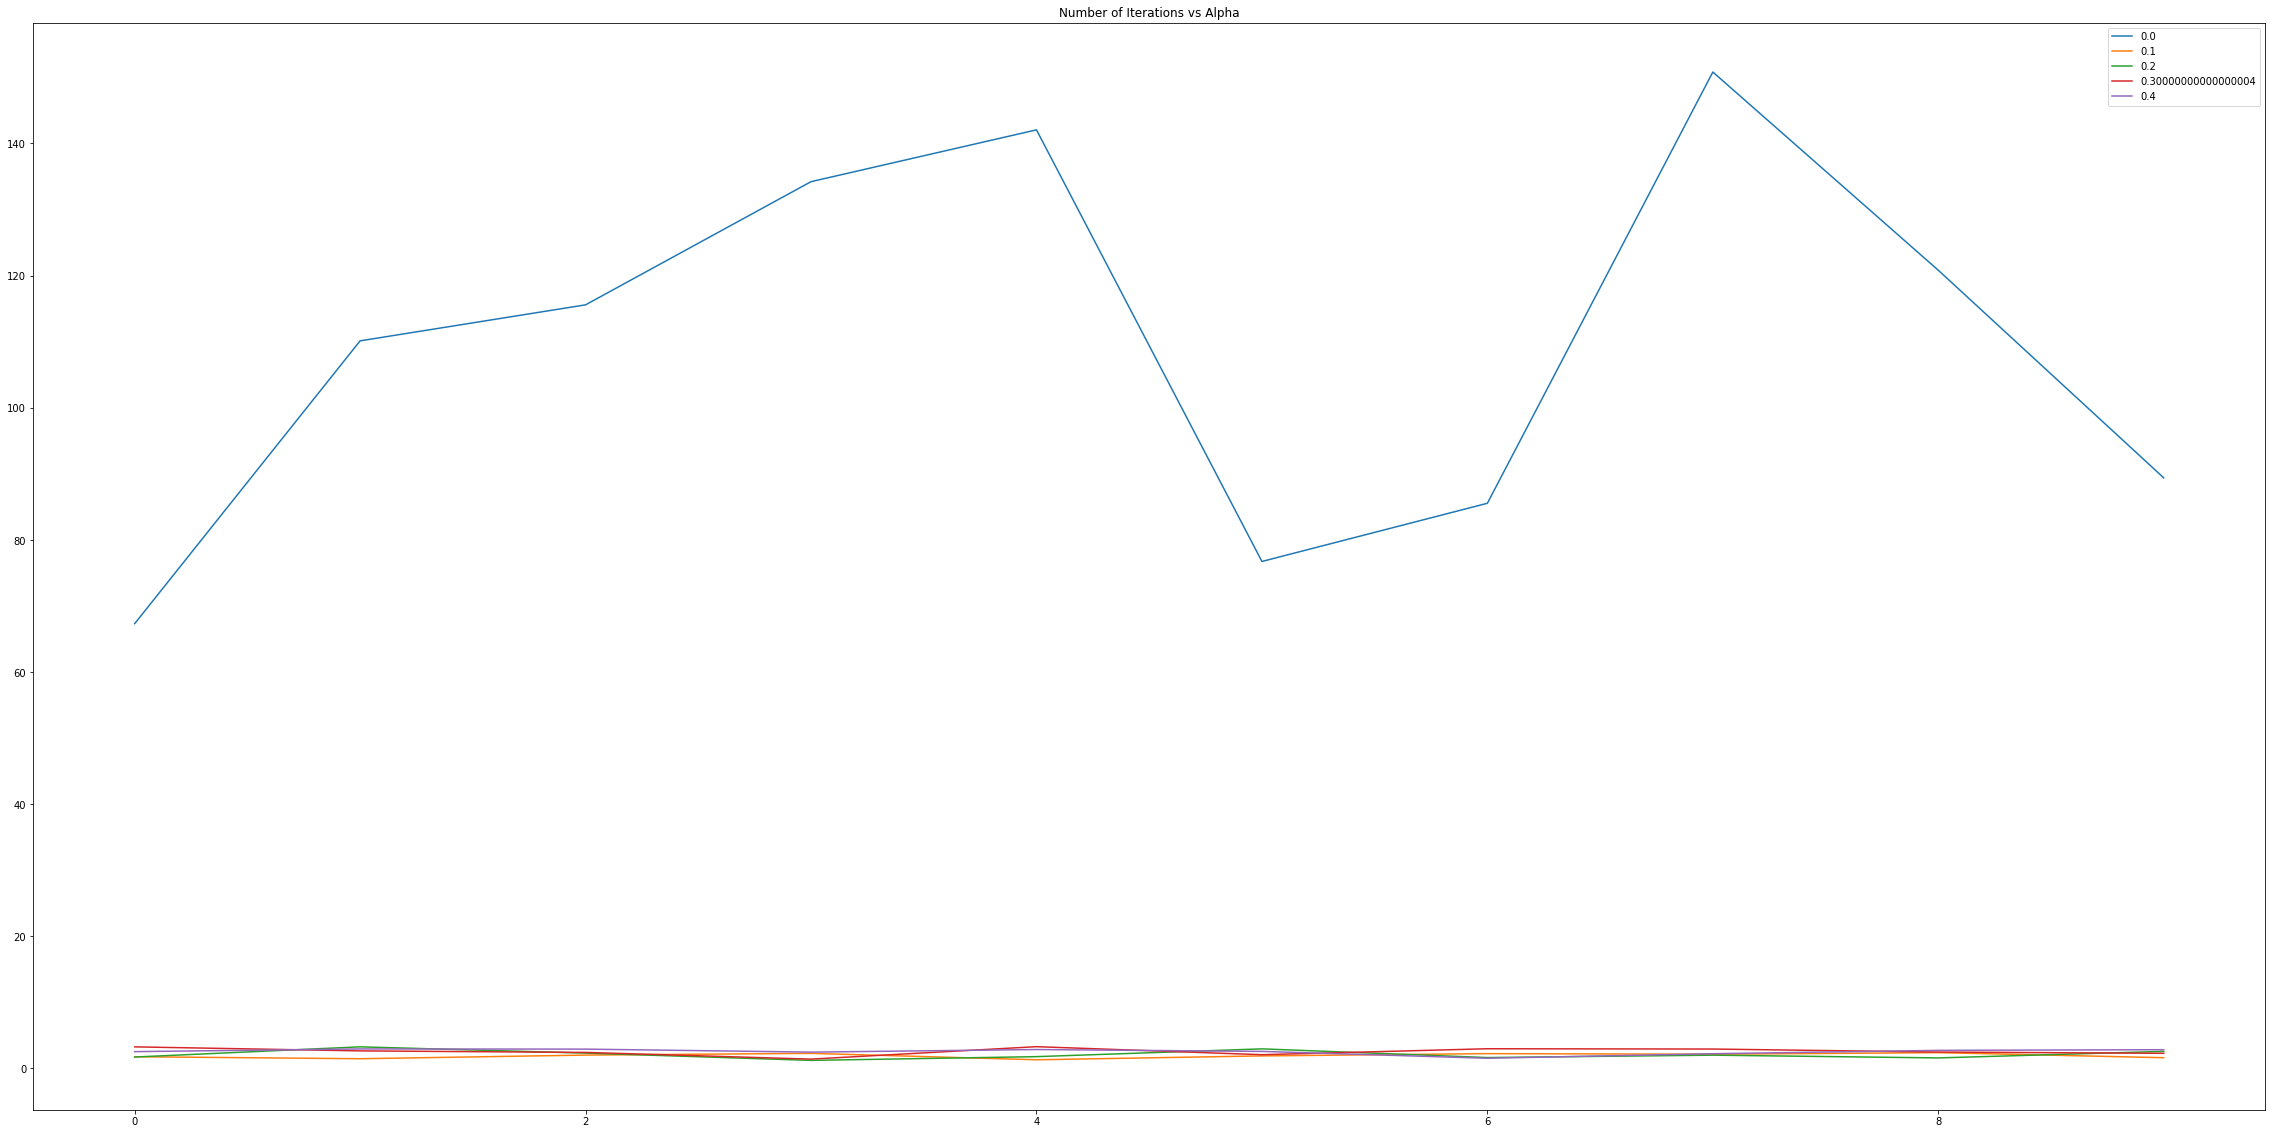

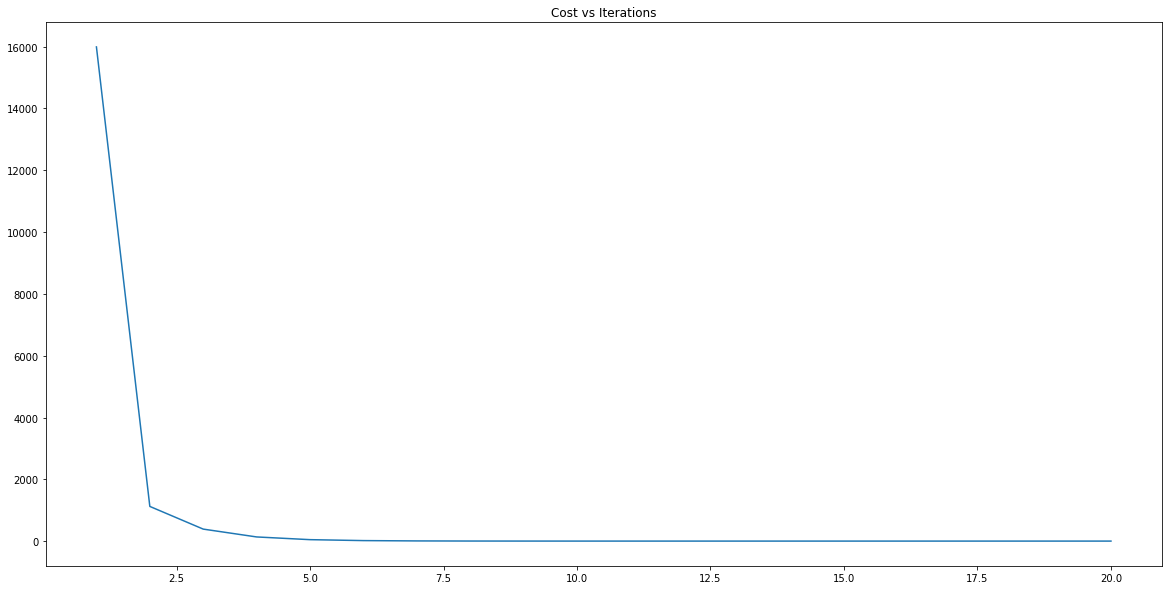

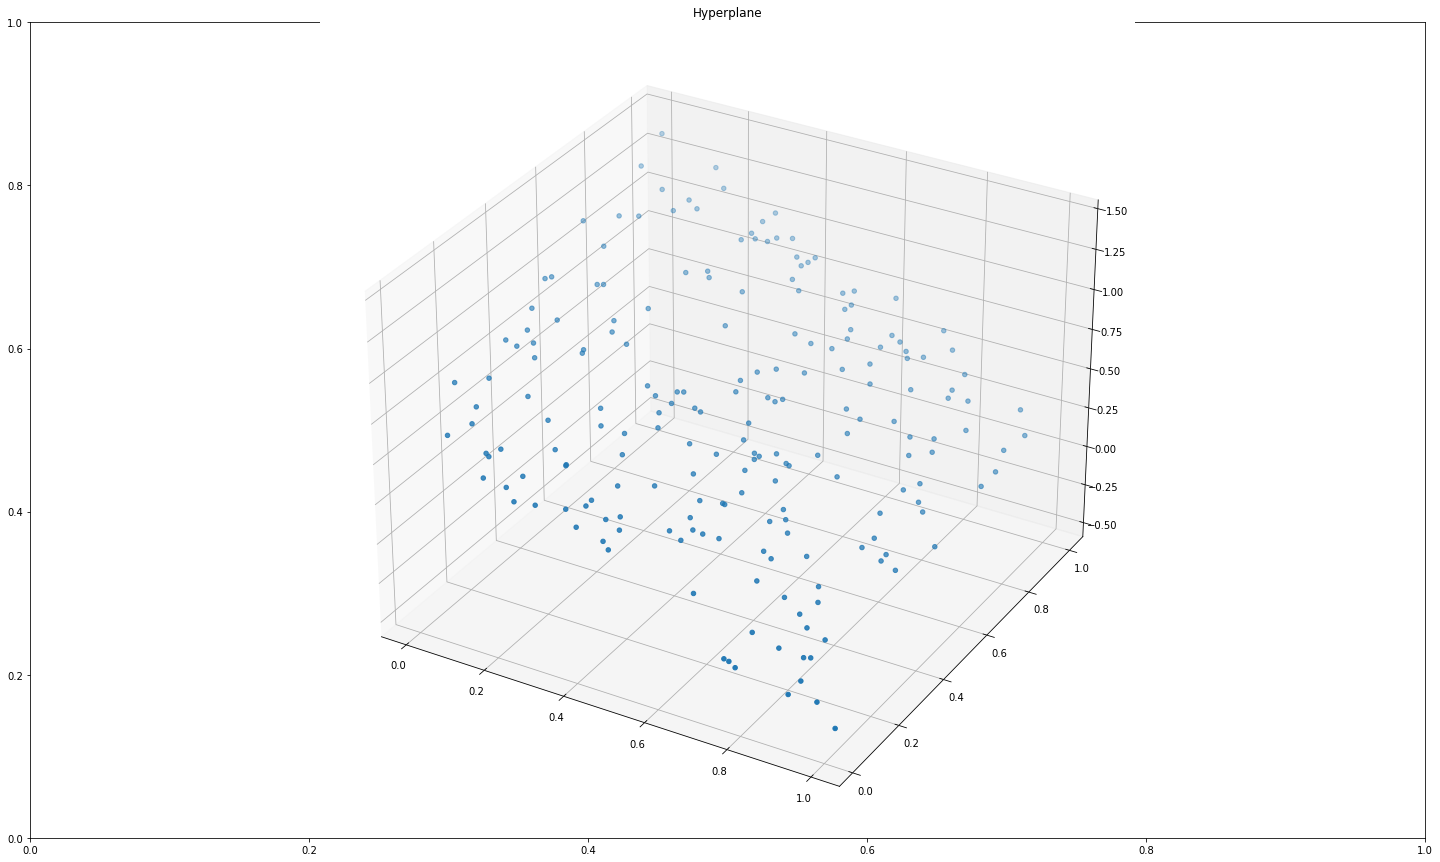

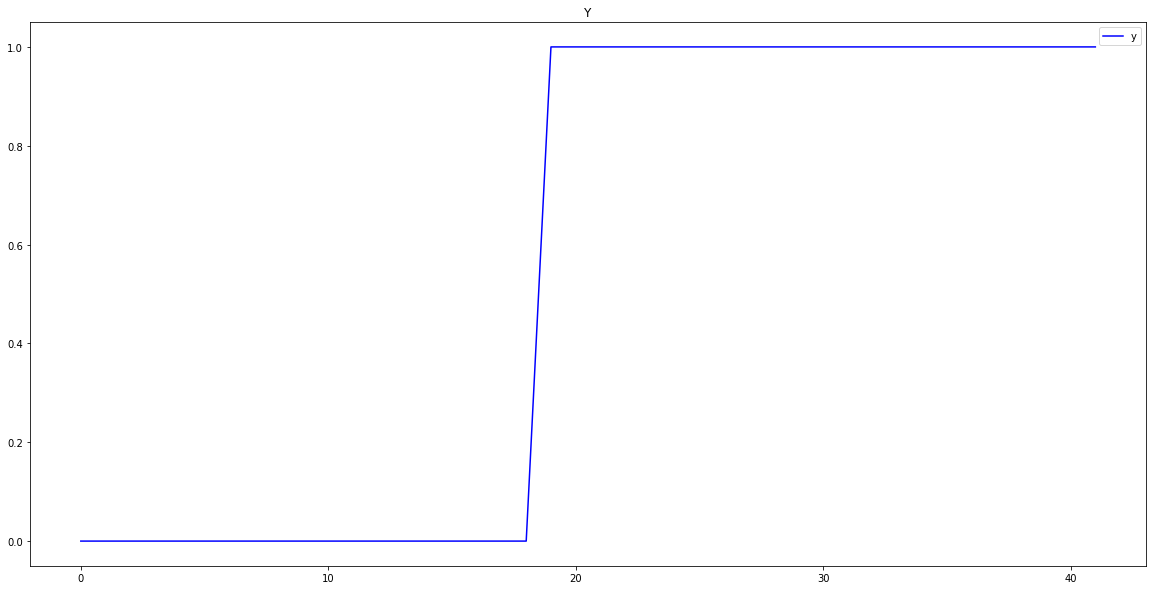

In [ ]:
lr = linear_regression()
lr.load_data('validation.csv')
lr.monte_carlo(maths.arange(0,0.5,0.1),10,0.7)
df_validation_training , df_validation_testing = lr.split_data()
lr.train(df_validation_training, sgd = True, plot_rmse = False, plot_metrics = True)
lr.test(df_validation_testing)

In [ ]:
lr.w_star

In [ ]:
threshold = 0.5

In [ ]:
df_test['y_pred'] = maths.matmul(df_test.iloc[:,:-1],lr.w_star)
df_test['y_pred'] = df_test['y_pred'].apply(lambda x: 1 if x > threshold else 0)

In [ ]:
create_confusion_matrix(list(df_test['y']),list(df_test['y_pred']))